In [34]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
from sklearn.metrics import r2_score

%matplotlib inline

In [35]:
train = pd.read_csv("datasets/train.csv")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [36]:
def column_cleaner(data): 
    data.columns=map(str.lower, data.columns)
    data.columns = data.columns.str.strip().str.replace(" ","_")


In [37]:
column_cleaner(train)

In [38]:
def fill_na(data): 
    data[['garage_qual', 'garage_cond']] = data[['garage_qual', 'garage_cond']].fillna(value = 0)
    data['mas_vnr_area'] = data[["mas_vnr_area"]].fillna(value = 0)
    data['bsmt_qual'] = data[["bsmt_qual"]].fillna(value = 0)
    data['bsmt_cond'] = data[["bsmt_cond"]].fillna(value = 0)
    return data

In [39]:
fill_na(train)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,RL,79.0,11449,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,1011.0,Unf,0.0,873.0,1884.0,GasA,Ex,Y,SBrkr,1728,0,0,1728,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2007.0,Fin,2.0,520.0,TA,TA,Y,0,276,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,298751
2047,785,905377130,30,RL,NaN,12342,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,1940,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,262.0,Unf,0.0,599.0,861.0,GasA,Ex,Y,SBrkr,861,0,0,861,0.0,0.0,1,0,1,1,TA,4,Typ,0,NaN,Detchd,1961.0,Unf,2.0,539.0,TA,TA,Y,158,0,0,0,0,0,NaN,NaN,NaN,0,3,2009,WD,82500
2048,916,909253010,50,RL,57.0,7558,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1.5Fin,6,6,1928,1950,Gable,CompShg,BrkFace,Stone,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,896.0,896.0,GasA,Gd,Y,SBrkr,1172,741,0,1913,0.0,0.0,1,1,3,1,TA,9,Typ,1,TA,Detchd,1929.0,Unf,2.0,342.0,Fa,Fa,Y,0,0,0,0,0,0,NaN,NaN,NaN

In [40]:
train.drop(index = [1712], inplace = True)

In [41]:
train.loc[train["garage_cars"].isnull()].index

Int64Index([], dtype='int64')

In [42]:
train.loc[train["total_bsmt_sf"].isnull()].index

Int64Index([1327], dtype='int64')

In [43]:
train.drop(index = [1327], inplace = True)

In [44]:
train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [45]:
def dataframe_dictionary_input(data): 
    street_cleaned = { "Grvl" : 0,"Pave" : 1}
    data["street"] = data[["street"]].replace(street_cleaned)


    na_to_ex_rating = {"Po" : 1, "Fa" : 2,"TA" : 3, "Gd" : 4, "Ex" : 5,}
    data['bsmt_qual'] = data[['bsmt_qual']].replace(na_to_ex_rating)
    data["bsmt_cond"] = data[['bsmt_cond']].replace(na_to_ex_rating)


    heating_qc_cleaned = {"Po" : 0, "Fa" : 1,"TA" : 2, "Gd" : 3, "Ex" : 4,}
    data['heating_qc'] = data[['heating_qc']].replace(heating_qc_cleaned)

    poor_to_ex_no_na = {"Po" : 0, "Fa" : 1,"TA" : 2, "Gd" : 3, "Ex" : 4,}
    data['kitchen_qual'] = data[['kitchen_qual']].replace(poor_to_ex_no_na)

    data['exter_qual'] = data[['exter_qual']].replace(poor_to_ex_no_na)
    data['exter_cond'] = data[['exter_cond']].replace(poor_to_ex_no_na)
    
    data['garage_qual'] = data[['garage_qual']].replace(na_to_ex_rating)
    data['garage_cond'] = data[['garage_cond']].replace(na_to_ex_rating)
    data['central_air'] = data['central_air'].map({'Y': 1, "N": 0})
    
    return data 


In [46]:
dataframe_dictionary_input(train)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,1,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,3,2,CBlock,3,3,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,4,1,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,3,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,3,3,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,1,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,3,2,PConc,4,3,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,4,1,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,3,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,3,3,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,1,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,3,CBlock,3,3,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,2,1,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,3,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,3,3,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,1,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,2,PConc,4,3,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,3,1,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,2,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,3,3,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,1,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,2,2,PConc,2,4,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,2,1,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,2,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,3,3,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,RL,79.0,11449,1,NaN,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,2,PConc,4,3,Av,GLQ,1011.0,Unf,0.0,873.0,1884.0,GasA,4,1,SBrkr,1728,0,0,1728,1.0,0.0,2,0,3,1,3,7,Typ,1,Gd,Attchd,2007.0,Fin,2.0,520.0,3,3,Y,0,276,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,298751
2047,785,905377130,30,RL,NaN,12342,1,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,1940,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,2,CBlock,3,3,No,BLQ,262.0,Unf,0.0,599.0,861.0,GasA,4,1,SBrkr,861,0,0,861,0.0,0.0,1,0,1,1,2,4,Typ,0,NaN,Detchd,1961.0,Unf,2.0,539.0,3,3,Y,158,0,0,0,0,0,NaN,NaN,NaN,0,3,2009,WD,82500
2048,916,909253010,50,RL,57.0,7558,1,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1.5Fin,6,6,1928,1950,Gable,CompShg,BrkFace,Stone,None,0.0,2,2,BrkTil,3,3,No,Unf,0.0,Unf,0.0,896.0,896.0,GasA,3,1,SBrkr,1172,741,0,1913,0.0,0.0,1,1,3,1,2,9,Typ,1,TA,Detchd,1929.0,Unf,2.0,342.0,2,2,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,3,2009,WD,177000
2049,639,535179160,20,RL,80.0,10400,1,NaN,Reg,Lvl,AllPub,Corner,Gtl,

In [47]:
def feature_interactions(data): 
    data["garage_comb"] = data["garage_area"] * data["garage_cars"]
    data["deck_*_porch"] = data["wood_deck_sf"] * data["open_porch_sf"]
    data["exter_cond*exter_qual"] = data["exter_cond"] * data["exter_qual"]
    data["bsmt_qual*bsmt_cond"] = data["bsmt_qual"] * data["bsmt_cond"]
    data['garage_qual*garage_con'] = data['garage_qual'] * data['garage_cond']
    return data 
    

In [48]:
feature_interactions(train)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,garage_comb,deck_*_porch,exter_cond*exter_qual,bsmt_qual*bsmt_cond,garage_qual*garage_con
0,109,533352170,60,RL,NaN,13517,1,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,3,2,CBlock,3,3,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,4,1,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,3,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,3,3,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500,950.0,0,6,9,9
1,544,531379050,60,RL,43.0,11492,1,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,3,2,PConc,4,3,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,4,1,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,3,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,3,3,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000,1118.0,0,6,12,9
2,153,535304180,20,RL,68.0,7922,1,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,3,CBlock,3,3,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,2,1,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,3,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,3,3,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000,246.0,0,6,9,9
3,318,916386060,60,RL,73.0,9802,1,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,2,PConc,4,3,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,3,1,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,2,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,3,3,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000,800.0,0,4,12,9
4,255,906425045,50,RL,82.0,14235,1,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,2,2,PConc,2,4,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,2,1,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,2,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,3,3,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500,968.0,0,4,8,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,RL,79.0,11449,1,NaN,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,2,PConc,4,3,Av,GLQ,1011.0,Unf,0.0,873.0,1884.0,GasA,4,1,SBrkr,1728,0,0,1728,1.0,0.0,2,0,3,1,3,7,Typ,1,Gd,Attchd,2007.0,Fin,2.0,520.0,3,3,Y,0,276,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,298751,1040.0,0,6,12,9
2047,785,905377130,30,RL,NaN,12342,1,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,1940,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,2,CBlock,3,3,No,BLQ,262.0,Unf,0.0,599.0,861.0,GasA,4,1,SBrkr,861,0,0,861,0.0,0.0,1,0,1,1,2,4,Typ,0,NaN,Detchd,1961.0,Unf,2.0,539.0,3,3,Y,158,0,0,0,0,0,NaN,NaN,NaN,0,3,2009,WD,82500,1078.0,0,4,9,9
2048,916,909253010,50,RL,57.0,7558,1,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1.5Fin,6,6,1928,1950,Gable,CompShg,BrkFace,Stone,None,0.0,2,2,BrkTil,3,3,No,Unf,0.0,Unf,0.0,896

In [49]:
def dummy_cols_maker(data):
    data = pd.get_dummies(data, columns = ['neighborhood'], drop_first=True)
    data = pd.get_dummies(data, columns = ['electrical'], drop_first = True)
    data = pd.get_dummies(data, columns = ['heating'], drop_first = True)
    data = pd.get_dummies(data, columns = ['functional'], drop_first = True)
    data = pd.get_dummies(data, columns = ['ms_zoning'], drop_first = True) 
    data = pd.get_dummies(data, columns = ['utilities'], drop_first = True)
    data = pd.get_dummies(data, columns = ['condition_1'], drop_first = True)

    
    return data

In [50]:
train = dummy_cols_maker(data = train) 

In [51]:
train.head()

,id,pid,ms_subclass,lot_frontage,lot_area,street,alley,lot_shape,land_contour,lot_config,land_slope,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,central_air,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,garage_comb,deck_*_porch,exter_cond*exter_qual,bsmt_qual*bsmt_cond,garage_qual*garage_con,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,electrical_FuseF,electrical_FuseP,electrical_Mix,electrical_SBrkr,heating_GasW,heating_Grav,heating_OthW,heating_Wall,functional_Maj2,functional_Min1,functional_Min2,functional_Mod,functional_Sal,functional_Sev,functional_Typ,ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,utilities_NoSeWa,utilities_NoSewr,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn
0,109,533352170,60,NaN,13517,1,NaN,IR1,Lvl,CulDSac,Gtl,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,3,2,CBlock,3,3,No,GLQ,533.0,Unf,0.0,192.0,725.0,4,1,725,754,0,1479,0.0,0.0,2,1,3,1,3,6,0,NaN,Attchd,1976.0,RFn,2.0,475.0,3,3,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500,950.0,0,6,9,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,544,531379050,60,43.0,11492,1,NaN,IR1,Lvl,CulDSac,Gtl,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,3,2,PConc,4,3,No,GLQ,637.0,Unf,0.0,276.0,913.0,4,1,913,1209,0,2122,1.0,0.0,2,1,4,1,3,8,1,TA,Attchd,1997.0,RFn,2.0,559.0,3,3,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000,1118.0,0,6,12,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,153,535304180,20,68.0,7922,1,NaN,Reg,Lvl,Inside,Gtl,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,3,CBlock,3,3,No,GLQ,731.0,Unf,0.0,326.0,1057.0,2,1,1057,0,0,1057,1.0,0.0,1,0,3,1,3,5,0,NaN,Detchd,1953.0,Unf,1.0,246.0,3,3,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000,246.0,0,6,9,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
3,318,916386060,60,73.0,9802,1,NaN,Reg,Lvl,Inside,Gtl,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,2,PConc,4,3,No,Unf,0.0,Unf,0.0,384.0,384.0,3,1,744,700,0,1444,0.0,0.0,2,1,3,1,2,7,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,3,3,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000,800.0,0,4,12,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4,255,906425045,50,82.0,14235,1,NaN,IR1,Lvl,Inside,Gtl,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,2,2,PConc,2,4,No,Unf,0.0,Unf,0.0,676.0,676.0,2,1,831,614,0,1445,0.0,0.0,2,0,3,1,2,6,0,NaN,Detchd,1957.0,Unf,2.0,484.0,3,3,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500,968

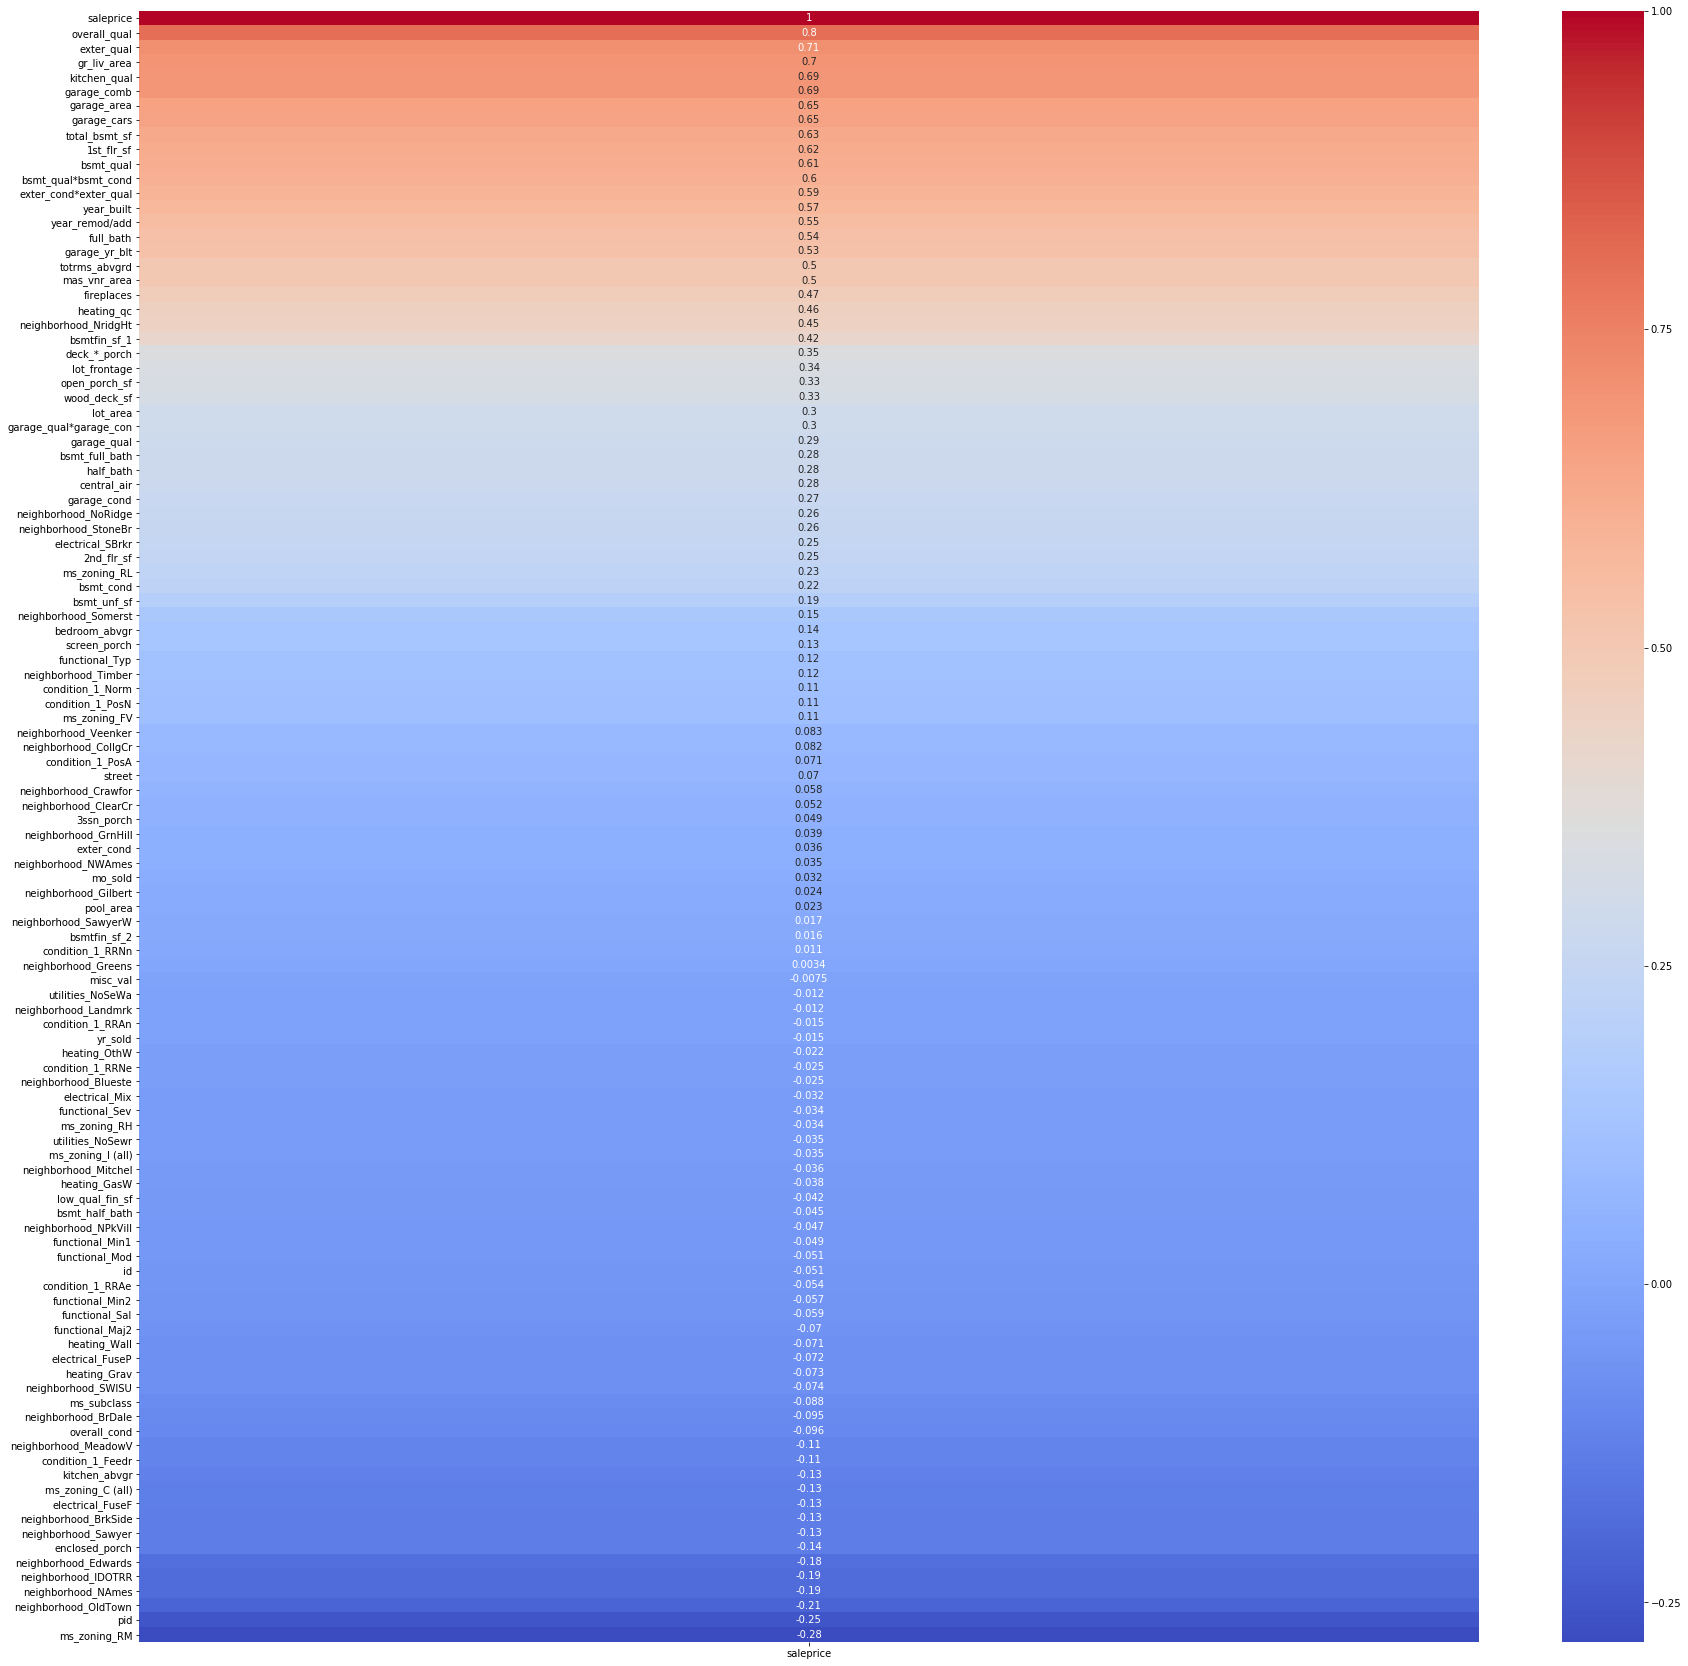

In [52]:
plt.figure(figsize = (30,30))
sns.heatmap(train.corr()[['saleprice']].sort_values(by = "saleprice" ,ascending = False), annot = True, cmap = 'coolwarm');

In [53]:
train.columns[-58:]

Index(['neighborhood_Blueste', 'neighborhood_BrDale', 'neighborhood_BrkSide',
       'neighborhood_ClearCr', 'neighborhood_CollgCr', 'neighborhood_Crawfor',
       'neighborhood_Edwards', 'neighborhood_Gilbert', 'neighborhood_Greens',
       'neighborhood_GrnHill', 'neighborhood_IDOTRR', 'neighborhood_Landmrk',
       'neighborhood_MeadowV', 'neighborhood_Mitchel', 'neighborhood_NAmes',
       'neighborhood_NPkVill', 'neighborhood_NWAmes', 'neighborhood_NoRidge',
       'neighborhood_NridgHt', 'neighborhood_OldTown', 'neighborhood_SWISU',
       'neighborhood_Sawyer', 'neighborhood_SawyerW', 'neighborhood_Somerst',
       'neighborhood_StoneBr', 'neighborhood_Timber', 'neighborhood_Veenker',
       'electrical_FuseF', 'electrical_FuseP', 'electrical_Mix',
       'electrical_SBrkr', 'heating_GasW', 'heating_Grav', 'heating_OthW',
       'heating_Wall', 'functional_Maj2', 'functional_Min1', 'functional_Min2',
       'functional_Mod', 'functional_Sal', 'functional_Sev', 'functional_Typ',


In [54]:
features = ['overall_qual', 'exter_qual', 'gr_liv_area', 'garage_comb', 'kitchen_qual', 'total_bsmt_sf',
              'deck_*_porch', 'exter_cond*exter_qual', 'wood_deck_sf', 'fireplaces', 'full_bath','bsmt_qual*bsmt_cond',
            'mas_vnr_area', 'open_porch_sf', 'year_built', 'year_remod/add', 
       'neighborhood_Blueste', 'neighborhood_BrDale', 'neighborhood_BrkSide',
       'neighborhood_ClearCr', 'neighborhood_CollgCr', 'neighborhood_Crawfor',
       'neighborhood_Edwards', 'neighborhood_Gilbert', 'neighborhood_Greens',
       'neighborhood_GrnHill', 'neighborhood_IDOTRR', 'neighborhood_Landmrk',
       'neighborhood_MeadowV', 'neighborhood_Mitchel', 'neighborhood_NAmes',
       'neighborhood_NPkVill', 'neighborhood_NWAmes', 'neighborhood_NoRidge',
       'neighborhood_NridgHt', 'neighborhood_OldTown', 'neighborhood_SWISU',
       'neighborhood_Sawyer', 'neighborhood_SawyerW', 'neighborhood_Somerst',
       'neighborhood_StoneBr', 'neighborhood_Timber', 'neighborhood_Veenker',
       'electrical_FuseF', 'electrical_FuseP', 'electrical_Mix',
       'electrical_SBrkr', 'heating_GasW', 'heating_Grav', 'heating_OthW',
       'heating_Wall', 'functional_Maj2', 'functional_Min1', 'functional_Min2',
       'functional_Mod', 'functional_Sal', 'functional_Sev', 'functional_Typ',
       'ms_zoning_C (all)', 'ms_zoning_FV', 'ms_zoning_I (all)',
       'ms_zoning_RH', 'ms_zoning_RL', 'ms_zoning_RM', 'utilities_NoSeWa',
       'utilities_NoSewr', 'condition_1_Feedr', 'condition_1_Norm',
       'condition_1_PosA', 'condition_1_PosN', 'condition_1_RRAe',
       'condition_1_RRAn', 'condition_1_RRNe', 'condition_1_RRNn', 'street']
             

In [55]:
X = train[features]
y = train['saleprice']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [57]:
pt = PowerTransformer()
pt.fit(X_train)
X_train_pt_transformed = pt.transform(X_train)
X_test_pt_transformed = pt.transform(X_test)
    
    
pt_y = PowerTransformer()
pt_y.fit(y_train.to_frame())
y_train_pt_transformed = pt_y.transform(y_train.to_frame())
y_test_pt_transformed = pt_y.transform(y_test.to_frame())
    
    

/Users/nathan/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/nathan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:2798: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [61]:
#def fitter_and_instantiator(): 
lr = LinearRegression()  

In [62]:
lasso = LassoCV(n_alphas=200, cv=5)

In [63]:
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))

In [64]:
lr_scores = cross_val_score(lr, X_train, y_train_pt_transformed, cv=3)
lr_scores.mean()

0.8354040356739959

In [65]:
lasso_scores = cross_val_score(lasso, X_train, y_train_pt_transformed[:, 0], cv=3)
lasso_scores.mean()

0.6718197013111511

In [66]:
ridge_scores = cross_val_score(ridge, X_train, y_train_pt_transformed, cv=3)
ridge_scores.mean()

0.8368478049484223

In [67]:
lr.fit(X_train, y_train_pt_transformed)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [68]:
lr.score(X_train, y_train_pt_transformed)

0.8887731511310196

In [69]:
lr.score(X_test, y_test_pt_transformed)

0.8643078480974979

In [70]:
ridge.fit(X_train, y_train_pt_transformed)

RidgeCV(alphas=array([ 0.1,  0.2, ...,  9.9, 10. ]), cv=None,
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [71]:
ridge.score(X_train, y_train_pt_transformed)

0.8883254511763016

In [72]:
ridge.score(X_test, y_test_pt_transformed)

0.8654366001123978

In [73]:
pred = ridge.predict(X_test)

In [74]:
pred_reversed = pt_y.inverse_transform(pred.reshape(-1,1))

In [75]:
r2_score(y_test, pred_reversed)

0.8959802702905767

In [77]:
test= pd.read_csv('datasets/test.csv')

In [78]:
column_cleaner(test)

In [79]:
dataframe_dictionary_input(test)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,1,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,2,1,Stone,2.0,3,No,Unf,0,Unf,0,1020,1020,GasA,3,0,FuseP,908,1020,0,1928,0,0,2,0,4,2,1,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,1,1.0,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,1,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,2,2,CBlock,4.0,3,No,Unf,0,Unf,0,1967,1967,GasA,2,1,SBrkr,1967,0,0,1967,0,0,2,0,6,2,2,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,3,3.0,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,1,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,2,PConc,4.0,4,Av,GLQ,554,Unf,0,100,654,GasA,4,1,SBrkr,664,832,0,1496,1,0,2,1,3,1,3,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,3,3.0,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,1,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,3,2,CBlock,3.0,3,No,Unf,0,Unf,0,968,968,GasA,2,1,SBrkr,968,0,0,968,0,0,1,0,2,1,2,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,2,3.0,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,1,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,2,2,CBlock,4.0,3,No,BLQ,609,Unf,0,785,1394,GasA,3,1,SBrkr,1394,0,0,1394,1,0,1,1,3,1,2,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,3,3.0,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,1662,527377110,60,RL,80.0,8000,1,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,PosN,Norm,1Fam,2Story,6,6,1974,1974,Gable,CompShg,HdBoard,HdBoard,None,0.0,2,2,CBlock,3.0,3,No,ALQ,931,LwQ,153,0,1084,GasA,2,1,SBrkr,1084,793,0,1877,1,0,2,1,4,1,2,8,Typ,1,TA,Attchd,1974.0,Unf,2,488,3,3.0,Y,0,96,0,0,0,0,NaN,NaN,NaN,0,11,2007,WD
875,1234,535126140,60,RL,90.0,14670,1,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,2Story,6,7,1966,1999,Gable,CompShg,VinylSd,VinylSd,BrkFace,410.0,3,3,CBlock,3.0,3,No,BLQ,575,Unf,0,529,1104,GasA,4,1,SBrkr,1104,884,0,1988,0,0,2,1,4,1,3,9,Typ,1,Gd,Attchd,1966.0,RFn,2,480,3,3.0,Y,0,230,0,0,0,0,NaN,MnPrv,NaN,0,8,2008,WD
876,1373,904100040,20,RL,55.0,8250,1,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,Norm,1Fam,1Story,5,5,1968,1968,Hip,CompShg,HdBoard,HdBoard,None,0.0,2,2,CBlock,3.0,3,No,BLQ,250,LwQ,492,210,952,GasA,4,1,SBrkr,1211,0,0,1211,0,0,1,0,3,1,2,5,Typ,1,TA,Attchd,1968.0,Unf,1,322,3,3.0,Y,0,63,0,0,0,0,NaN,NaN,NaN,0,8,2008,WD
877,1672,527425140,20,RL,60.0,9000,1,NaN,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,6,1971,1971,Gable,CompShg,HdBoard,HdBoard,None,0.0,2,2,PConc,3.0,3,No,ALQ,616,Unf,0,248,864,GasA,2,1,SBrkr,864,0,0,864,

In [80]:
fill_na(test)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,1,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,2,1,Stone,2.0,3,No,Unf,0,Unf,0,1020,1020,GasA,3,0,FuseP,908,1020,0,1928,0,0,2,0,4,2,1,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,1,1.0,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,1,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,2,2,CBlock,4.0,3,No,Unf,0,Unf,0,1967,1967,GasA,2,1,SBrkr,1967,0,0,1967,0,0,2,0,6,2,2,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,3,3.0,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,1,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,2,PConc,4.0,4,Av,GLQ,554,Unf,0,100,654,GasA,4,1,SBrkr,664,832,0,1496,1,0,2,1,3,1,3,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,3,3.0,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,1,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,3,2,CBlock,3.0,3,No,Unf,0,Unf,0,968,968,GasA,2,1,SBrkr,968,0,0,968,0,0,1,0,2,1,2,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,2,3.0,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,1,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,2,2,CBlock,4.0,3,No,BLQ,609,Unf,0,785,1394,GasA,3,1,SBrkr,1394,0,0,1394,1,0,1,1,3,1,2,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,3,3.0,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,1662,527377110,60,RL,80.0,8000,1,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,PosN,Norm,1Fam,2Story,6,6,1974,1974,Gable,CompShg,HdBoard,HdBoard,None,0.0,2,2,CBlock,3.0,3,No,ALQ,931,LwQ,153,0,1084,GasA,2,1,SBrkr,1084,793,0,1877,1,0,2,1,4,1,2,8,Typ,1,TA,Attchd,1974.0,Unf,2,488,3,3.0,Y,0,96,0,0,0,0,NaN,NaN,NaN,0,11,2007,WD
875,1234,535126140,60,RL,90.0,14670,1,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,2Story,6,7,1966,1999,Gable,CompShg,VinylSd,VinylSd,BrkFace,410.0,3,3,CBlock,3.0,3,No,BLQ,575,Unf,0,529,1104,GasA,4,1,SBrkr,1104,884,0,1988,0,0,2,1,4,1,3,9,Typ,1,Gd,Attchd,1966.0,RFn,2,480,3,3.0,Y,0,230,0,0,0,0,NaN,MnPrv,NaN,0,8,2008,WD
876,1373,904100040,20,RL,55.0,8250,1,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,Norm,1Fam,1Story,5,5,1968,1968,Hip,CompShg,HdBoard,HdBoard,None,0.0,2,2,CBlock,3.0,3,No,BLQ,250,LwQ,492,210,952,GasA,4,1,SBrkr,1211,0,0,1211,0,0,1,0,3,1,2,5,Typ,1,TA,Attchd,1968.0,Unf,1,322,3,3.0,Y,0,63,0,0,0,0,NaN,NaN,NaN,0,8,2008,WD
877,1672,527425140,20,RL,60.0,9000,1,NaN,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,6,1971,1971,Gable,CompShg,HdBoard,HdBoard,None,0.0,2,2,PConc,3.0,3,No,ALQ,616,Unf,0,248,864,GasA,2,1,SBrkr,864,0,0,864,

In [81]:
feature_interactions(test)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,garage_comb,deck_*_porch,exter_cond*exter_qual,bsmt_qual*bsmt_cond,garage_qual*garage_con
0,2658,902301120,190,RM,69.0,9142,1,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,2,1,Stone,2.0,3,No,Unf,0,Unf,0,1020,1020,GasA,3,0,FuseP,908,1020,0,1928,0,0,2,0,4,2,1,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,1,1.0,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD,440,0,2,6.0,1.0
1,2718,905108090,90,RL,NaN,9662,1,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,2,2,CBlock,4.0,3,No,Unf,0,Unf,0,1967,1967,GasA,2,1,SBrkr,1967,0,0,1967,0,0,2,0,6,2,2,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,3,3.0,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD,1160,0,4,12.0,9.0
2,2414,528218130,60,RL,58.0,17104,1,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,2,PConc,4.0,4,Av,GLQ,554,Unf,0,100,654,GasA,4,1,SBrkr,664,832,0,1496,1,0,2,1,3,1,3,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,3,3.0,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New,852,2400,6,16.0,9.0
3,1989,902207150,30,RM,60.0,8520,1,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,3,2,CBlock,3.0,3,No,Unf,0,Unf,0,968,968,GasA,2,1,SBrkr,968,0,0,968,0,0,1,0,2,1,2,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,2,3.0,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD,960,0,6,9.0,6.0
4,625,535105100,20,RL,NaN,9500,1,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,2,2,CBlock,4.0,3,No,BLQ,609,Unf,0,785,1394,GasA,3,1,SBrkr,1394,0,0,1394,1,0,1,1,3,1,2,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,3,3.0,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD,1028,0,4,12.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,1662,527377110,60,RL,80.0,8000,1,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,PosN,Norm,1Fam,2Story,6,6,1974,1974,Gable,CompShg,HdBoard,HdBoard,None,0.0,2,2,CBlock,3.0,3,No,ALQ,931,LwQ,153,0,1084,GasA,2,1,SBrkr,1084,793,0,1877,1,0,2,1,4,1,2,8,Typ,1,TA,Attchd,1974.0,Unf,2,488,3,3.0,Y,0,96,0,0,0,0,NaN,NaN,NaN,0,11,2007,WD,976,0,4,9.0,9.0
875,1234,535126140,60,RL,90.0,14670,1,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,2Story,6,7,1966,1999,Gable,CompShg,VinylSd,VinylSd,BrkFace,410.0,3,3,CBlock,3.0,3,No,BLQ,575,Unf,0,529,1104,GasA,4,1,SBrkr,1104,884,0,1988,0,0,2,1,4,1,3,9,Typ,1,Gd,Attchd,1966.0,RFn,2,480,3,3.0,Y,0,230,0,0,0,0,NaN,MnPrv,NaN,0,8,2008,WD,960,0,9,9.0,9.0
876,1373,904100040,20,RL,55.0,8250,1,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,Norm,1Fam,1Story,5,5,1968,1968,Hip,CompShg,HdBoard,HdBoard,None,0.0,2,2,CBlock,3.0,3,No,BLQ,250,LwQ,492,210,952,GasA,4,1,SBrkr,1211,0,0,1211,0,0,1,0,3,1,2,5,Typ,1,TA,Attchd,1968.0,Unf,1,322,3,3.0,Y,0,63,0,0,0,0,NaN,NaN

In [82]:
test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,garage_comb,deck_*_porch,exter_cond*exter_qual,bsmt_qual*bsmt_cond,garage_qual*garage_con
0,2658,902301120,190,RM,69.0,9142,1,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,2,1,Stone,2.0,3,No,Unf,0,Unf,0,1020,1020,GasA,3,0,FuseP,908,1020,0,1928,0,0,2,0,4,2,1,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,1,1.0,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD,440,0,2,6.0,1.0
1,2718,905108090,90,RL,NaN,9662,1,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,2,2,CBlock,4.0,3,No,Unf,0,Unf,0,1967,1967,GasA,2,1,SBrkr,1967,0,0,1967,0,0,2,0,6,2,2,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,3,3.0,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD,1160,0,4,12.0,9.0
2,2414,528218130,60,RL,58.0,17104,1,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,2,PConc,4.0,4,Av,GLQ,554,Unf,0,100,654,GasA,4,1,SBrkr,664,832,0,1496,1,0,2,1,3,1,3,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,3,3.0,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New,852,2400,6,16.0,9.0
3,1989,902207150,30,RM,60.0,8520,1,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,3,2,CBlock,3.0,3,No,Unf,0,Unf,0,968,968,GasA,2,1,SBrkr,968,0,0,968,0,0,1,0,2,1,2,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,2,3.0,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD,960,0,6,9.0,6.0
4,625,535105100,20,RL,NaN,9500,1,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,2,2,CBlock,4.0,3,No,BLQ,609,Unf,0,785,1394,GasA,3,1,SBrkr,1394,0,0,1394,1,0,1,1,3,1,2,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,3,3.0,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD,1028,0,4,12.0,9.0


In [83]:

test = dummy_cols_maker(data = test) 

In [84]:
test.head()

,id,pid,ms_subclass,lot_frontage,lot_area,street,alley,lot_shape,land_contour,lot_config,land_slope,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,central_air,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,garage_comb,deck_*_porch,exter_cond*exter_qual,bsmt_qual*bsmt_cond,garage_qual*garage_con,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,electrical_FuseF,electrical_FuseP,electrical_SBrkr,heating_GasA,heating_GasW,heating_Grav,functional_Maj2,functional_Min1,functional_Min2,functional_Mod,functional_Typ,ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,utilities_NoSewr,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn
0,2658,902301120,190,69.0,9142,1,Grvl,Reg,Lvl,Inside,Gtl,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,2,1,Stone,2.0,3,No,Unf,0,Unf,0,1020,1020,3,0,908,1020,0,1928,0,0,2,0,4,2,1,9,0,NaN,Detchd,1910.0,Unf,1,440,1,1.0,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD,440,0,2,6.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
1,2718,905108090,90,NaN,9662,1,NaN,IR1,Lvl,Inside,Gtl,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,2,2,CBlock,4.0,3,No,Unf,0,Unf,0,1967,1967,2,1,1967,0,0,1967,0,0,2,0,6,2,2,10,0,NaN,Attchd,1977.0,Fin,2,580,3,3.0,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD,1160,0,4,12.0,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,2414,528218130,60,58.0,17104,1,NaN,IR1,Lvl,Inside,Gtl,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,2,PConc,4.0,4,Av,GLQ,554,Unf,0,100,654,4,1,664,832,0,1496,1,0,2,1,3,1,3,7,1,Gd,Attchd,2006.0,RFn,2,426,3,3.0,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New,852,2400,6,16.0,9.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,1989,902207150,30,60.0,8520,1,NaN,Reg,Lvl,Inside,Gtl,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,3,2,CBlock,3.0,3,No,Unf,0,Unf,0,968,968,2,1,968,0,0,968,0,0,1,0,2,1,2,5,0,NaN,Detchd,1935.0,Unf,2,480,2,3.0,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD,960,0,6,9.0,6.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,625,535105100,20,NaN,9500,1,NaN,IR1,Lvl,Inside,Gtl,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,2,2,CBlock,4.0,3,No,BLQ,609,Unf,0,785,1394,3,1,1394,0,0,1394,1,0,1,1,3,1,2,6,2,Gd,Attchd,1963.0,RFn,2,514,3,3.0,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD,1028,0,4,12.0,9.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [85]:
test['neighborhood_GrnHill'] = 0 
test['electrical_Mix'] = 0 
test['neighborhood_Landmrk'] = 0
test['heating_Wall'] = 0 
test['heating_OthW'] = 0 
test['functional_Sal'] = 0
test['functional_Sev'] =0 
test['utilities_NoSeWa'] =0 
test['ms_zoning_C (all)'] = 0 

In [86]:
test[features]

,overall_qual,exter_qual,gr_liv_area,garage_comb,kitchen_qual,total_bsmt_sf,deck_*_porch,exter_cond*exter_qual,wood_deck_sf,fireplaces,full_bath,bsmt_qual*bsmt_cond,mas_vnr_area,open_porch_sf,year_built,year_remod/add,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,electrical_FuseF,electrical_FuseP,electrical_Mix,electrical_SBrkr,heating_GasW,heating_Grav,heating_OthW,heating_Wall,functional_Maj2,functional_Min1,functional_Min2,functional_Mod,functional_Sal,functional_Sev,functional_Typ,ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,utilities_NoSeWa,utilities_NoSewr,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,street
0,6,2,1928,440,1,1020,0,2,0,0,2,6.0,0.0,60,1910,1950,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
1,5,2,1967,1160,2,1967,0,4,170,0,2,12.0,0.0,0,1977,1977,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
2,7,3,1496,852,3,654,2400,6,100,1,2,16.0,0.0,24,2006,2006,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
3,5,3,968,960,2,968,0,6,0,0,1,9.0,0.0,0,1923,2006,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
4,6,2,1394,1028,2,1394,0,4,0,2,1,12.0,247.0,76,1963,1963,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,6,2,1877,976,2,1084,0,4,0,1,2,9.0,0.0,96,1974,1974,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
875,6,3,1988,960,3,1104,0,9,0,1,2,9.0,410.0,230,1966,1999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
876,5,2,1211,322,2,952,0,4,0,1,1,9.0,0.0,63,1968,1968,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
877,4,2,864,1056,2,864,0,4,0,0,1,9.0,0.0,0,1971,1971,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1


In [87]:
#def prediction_maker(data): 
test_preds = ridge.predict(test[features])
pred_reversed = pt_y.inverse_transform(test_preds.reshape(-1,1))
test['preds_1'] = pred_reversed

submission_10 = test.loc[:, ['id', 'preds_1']]
submission_10.rename(columns = {'id': 'Id', 'preds_1': 'SalePrice'}, inplace=True)
    

In [88]:
submission_10.head()
   

,Id,SalePrice
0,2658,109254.619094
1,2718,181468.702350
2,2414,202829.268664
3,1989,111695.938128
4,625,174592.126285


In [89]:
submission_10.to_csv('./Submissions/submissions_10', index=False )